In [1]:
import pandas as pd


def filter_data(df, column1, values1):
    data = df.copy()
    
    # Filter rows based on the specified column and values
    filtered_data = data[data[column1].isin(values1)]
    filtered_data = filtered_data[filtered_data['Units'] != 'Index']
    #filtered_data = data[~data[column2].isin(values2)]
    return filtered_data

data = pd.read_csv("/Users/anushreegupta/Downloads/MSAM/ML2/Final Project/WEOOct2023all.csv",encoding='latin1')
column1 = 'Subject Descriptor'  
values1 = ['Gross domestic product, constant prices', 'Gross domestic product per capita, constant prices', 
           'Gross domestic product based on purchasing-power-parity (PPP) share of world total', 
           'Implied PPP conversion rate', 'Total investment', 'Gross national savings', 
           'Inflation, average consumer prices', 'Population, General government revenue', 
           'General government total expenditure', 'General government net lending/borrowing', 'General government gross debt', 
           'Gross domestic product corresponding to fiscal year, current prices', 'Current account balance']

#final_df = filter_data(data, column1, values1, column2, values2)
final_df = filter_data(data, column1, values1)
final_df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,288.87","1,021.60",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,-2.351,-20.737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
6,512,AFG,NGDPRPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant national currency...,National currency,Units,"See notes for: Gross domestic product, consta...",NaN,...,"39,127.08","30,315.97",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
7,512,AFG,NGDPRPPPPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",NaN,...,"2,328.76","1,804.34",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
12,512,AFG,PPPSH,Afghanistan,Gross domestic product based on purchasing-pow...,Expressed in percent of world GDP in PPP dolla...,Percent,NaN,"See notes for: Gross domestic product, curren...",NaN,...,0.061,0.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,698,ZWE,GGXWDG,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,"1,164.36","1,905.21","12,102.06","106,757.86","269,963.93","575,420.93","1,007,634.58","1,513,701.50","1,763,004.39",2021.0
8620,698,ZWE,GGXWDG_NGDP,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,Percent of GDP,NaN,See notes for: General government gross debt ...,NaN,...,84.365,59.769,98.449,95.435,56.944,52.201,48.213,48.416,42.699,2021.0
8621,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,"1,380.14","3,187.63","12,292.67","111,864.93","474,084.10","1,102,309.64","2,089,955.60","3,126,416.82","4,128,929.25",2021.0
8622,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,0.678,0.348,0.321,0.28,-0.317,-0.411,-0.466,-0.512,-0.55,2022.0


In [2]:
data = final_df.copy()

# function to extract data for a specific country
def extract_country_data(country_name):
    country_data = data[data['Country'] == country_name] 
    return country_data

In [3]:
def preprocess(file):
    df = file.copy()
    df['Variables'] = df['Subject Descriptor'] + ' (' + df['Units'] + ')'

    df.drop(columns = ['WEO Country Code', 'Scale', 'ISO', 'WEO Subject Code', 'Subject Descriptor', 'Subject Notes', 'Units', 'Country/Series-specific Notes', 'Estimates Start After'], axis=1, inplace=True)
    column_names = list(df.columns)
    column_names.insert(1, column_names.pop())  

    df = df[column_names]
    # Melt the DataFrame
    df = pd.melt(df, id_vars=['Country', 'Variables'], 
                    var_name='Year', 
                    value_name='Value')

    # Pivot the DataFrame using groupby and apply
    df = df.groupby(['Country', 'Year', 'Variables'])['Value'].apply(lambda x: x.iloc[0]).unstack('Variables').reset_index()   

    return df


In [4]:
def preprocess_columns(df, columns, func):
    for col in columns:
        df[col] = df[col].apply(func)
    return df

def data_type(data):

    # Remove commas from numeric columns
    numeric_columns = ['Current account balance (Percent of GDP)',
       'Current account balance (U.S. dollars)',
       'General government gross debt (National currency)',
       'General government gross debt (Percent of GDP)',
       'General government net lending/borrowing (National currency)',
       'General government net lending/borrowing (Percent of GDP)',
       'General government total expenditure (National currency)',
       'General government total expenditure (Percent of GDP)',
       'Gross domestic product based on purchasing-power-parity (PPP) share of world total (Percent)',
       'Gross domestic product corresponding to fiscal year, current prices (National currency)',
       'Gross domestic product per capita, constant prices (National currency)',
       'Gross domestic product per capita, constant prices (Purchasing power parity; 2017 international dollar)',
       'Gross domestic product, constant prices (National currency)',
       'Gross domestic product, constant prices (Percent change)',
       'Gross national savings (Percent of GDP)',
       'Implied PPP conversion rate (National currency per current international dollar)',
       'Inflation, average consumer prices (Percent change)',
       'Total investment (Percent of GDP)'
    ]
    
    data = preprocess_columns(data, numeric_columns, lambda x: x.replace(',', '') if isinstance(x, str) else x)
    
    data_types = {
        'Country': 'object',
        'Year': 'int64',
        'Current account balance (Percent of GDP)': 'float64',
       'Current account balance (U.S. dollars)': 'float64',
       'General government gross debt (National currency)': 'float64',
       'General government gross debt (Percent of GDP)': 'float64',
       'General government net lending/borrowing (National currency)': 'float64',
       'General government net lending/borrowing (Percent of GDP)': 'float64',
       'General government total expenditure (National currency)': 'float64',
       'General government total expenditure (Percent of GDP)': 'float64',
       'Gross domestic product based on purchasing-power-parity (PPP) share of world total (Percent)': 'float64',
       'Gross domestic product corresponding to fiscal year, current prices (National currency)': 'float64',
       'Gross domestic product per capita, constant prices (National currency)': 'float64',
       'Gross domestic product per capita, constant prices (Purchasing power parity; 2017 international dollar)':'float64',
       'Gross domestic product, constant prices (National currency)': 'float64',
       'Gross domestic product, constant prices (Percent change)': 'float64',
       'Gross national savings (Percent of GDP)': 'float64',
       'Implied PPP conversion rate (National currency per current international dollar)': 'float64',
       'Inflation, average consumer prices (Percent change)': 'float64',
       'Total investment (Percent of GDP)': 'float64'
    }
    
    data = data.astype(data_types)
    return data


In [5]:
def final_country_df(country_name):
    country_data = extract_country_data(country_name)

    data_alter = country_data.drop(columns = ['1980', '1981', '1982', '1983', '1984',
        '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
        '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001','2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028'])

    df_from_2002 = preprocess(data_alter)

    future_data = country_data.loc[:, ['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
        'Subject Descriptor', 'Subject Notes', 'Units', 'Scale',
        'Country/Series-specific Notes','2020', '2021', '2022', '2023', '2024', '2023', '2024', 'Estimates Start After' ]]

    prediction_data = preprocess(future_data)

    df_from_2002 = data_type(df_from_2002)
    prediction_data = data_type(prediction_data)

    return df_from_2002, prediction_data

### United States

In [6]:
country_name = 'United States' 
US_df_from_2002, US_prediction_data  = final_country_df(country_name)

In [7]:
US_df_from_2002

Variables,Country,Year,Current account balance (Percent of GDP),Current account balance (U.S. dollars),General government gross debt (National currency),General government gross debt (Percent of GDP),General government net lending/borrowing (National currency),General government net lending/borrowing (Percent of GDP),General government total expenditure (National currency),General government total expenditure (Percent of GDP),Gross domestic product based on purchasing-power-parity (PPP) share of world total (Percent),"Gross domestic product corresponding to fiscal year, current prices (National currency)","Gross domestic product per capita, constant prices (National currency)","Gross domestic product per capita, constant prices (Purchasing power parity; 2017 international dollar)","Gross domestic product, constant prices (National currency)","Gross domestic product, constant prices (Percent change)",Gross national savings (Percent of GDP),Implied PPP conversion rate (National currency per current international dollar),"Inflation, average consumer prices (Percent change)",Total investment (Percent of GDP)
0,United States,2002,-4.173,-456.106,6069.79,55.538,-416.882,-3.814,3682.17,33.691,19.758,10929.10,46831.46,50460.27,13488.35,1.696,18.263,1.0,1.596,21.723
1,United States,2003,-4.559,-522.293,6716.29,58.625,-545.815,-4.764,3898.71,34.031,19.520,11456.45,47691.56,51387.02,13865.53,2.796,17.314,1.0,2.298,21.746
2,United States,2004,-5.205,-635.891,8074.93,66.095,-517.661,-4.237,4118.74,33.713,19.258,12217.18,49080.56,52883.65,14399.68,3.852,17.626,1.0,2.668,22.652
3,United States,2005,-5.746,-749.232,8533.12,65.442,-400.077,-3.068,4423.05,33.921,19.028,13039.20,50322.52,54221.85,14901.25,3.483,18.018,1.0,3.366,23.376
4,United States,2006,-5.911,-816.647,8866.52,64.178,-280.349,-2.029,4653.77,33.685,18.577,13815.60,51235.84,55205.94,15315.93,2.783,19.086,1.0,3.222,23.538
5,United States,2007,-5.089,-736.549,9345.47,64.566,-420.579,-2.906,5001.49,34.554,17.980,14474.25,51751.28,55761.32,15623.88,2.011,17.302,1.0,2.871,22.557
6,United States,2008,-4.716,-696.523,10843.02,73.413,-975.466,-6.604,5484.94,37.136,17.483,14769.85,51335.91,55313.76,15642.98,0.122,14.936,1.0,3.815,21.037
7,United States,2009,-2.623,-379.729,12535.29,86.581,-1906.800,-13.170,5992.77,41.392,17.101,14478.05,49569.21,53410.17,15236.28,-2.600,13.727,1.0,-0.320,17.769
8,United States,2010,-2.871,-432.010,14317.67,95.141,-1652.790,-10.983,5982.39,39.753,16.675,15048.98,50523.50,54438.39,15649.00,2.709,15.201,1.0,1.637,18.672
9,United States,2011,-2.919,-455.302,15518.34,99.478,-1513.630,-9.703,6050.10,38.783,16.286,15599.73,50943.53,54890.98,15891.53,1.550,16.162,1.0,3.140,19.034


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Drop rows with missing values and select relevant features
features = ['Year', 'Current account balance (Percent of GDP)',
       'Current account balance (U.S. dollars)',
       'General government gross debt (National currency)',
       'General government gross debt (Percent of GDP)',
       'General government net lending/borrowing (National currency)',
       'General government net lending/borrowing (Percent of GDP)',
       'General government total expenditure (National currency)',
       'General government total expenditure (Percent of GDP)',
       'Gross domestic product based on purchasing-power-parity (PPP) share of world total (Percent)',
       'Gross domestic product corresponding to fiscal year, current prices (National currency)',
       'Gross domestic product per capita, constant prices (National currency)',
       'Gross domestic product per capita, constant prices (Purchasing power parity; 2017 international dollar)',
       'Gross domestic product, constant prices (National currency)',
       'Gross domestic product, constant prices (Percent change)',
       'Gross national savings (Percent of GDP)',
       'Implied PPP conversion rate (National currency per current international dollar)',
       'Total investment (Percent of GDP)']

X = US_df_from_2002[features]
y = US_df_from_2002['Inflation, average consumer prices (Percent change)']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred_train = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)

y_pred_test = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)

# Step 6: Forecasting
new_X = US_prediction_data[features]
new_predictions = model.predict(new_X)

# Add forecasted data to the prediction dataset
US_prediction_data['Forecasted_Inflation_Rate(RF)'] = new_predictions

# Display the updated prediction dataset with forecasted inflation rates
US_prediction_data[['Year', 'Country','Inflation, average consumer prices (Percent change)', 'Forecasted_Inflation_Rate(RF)']]


Training MAE: 0.30382642857142933
Training MSE: 0.18577670595000043
Testing MAE: 0.7459075000000005
Testing MSE: 0.7155970072750006


Variables,Year,Country,"Inflation, average consumer prices (Percent change)",Forecasted_Inflation_Rate(RF)
0,2020,United States,1.251,2.16488
1,2021,United States,4.683,2.30812
2,2022,United States,7.986,2.44821
3,2023,United States,4.084,2.46906
4,2024,United States,2.759,2.46131


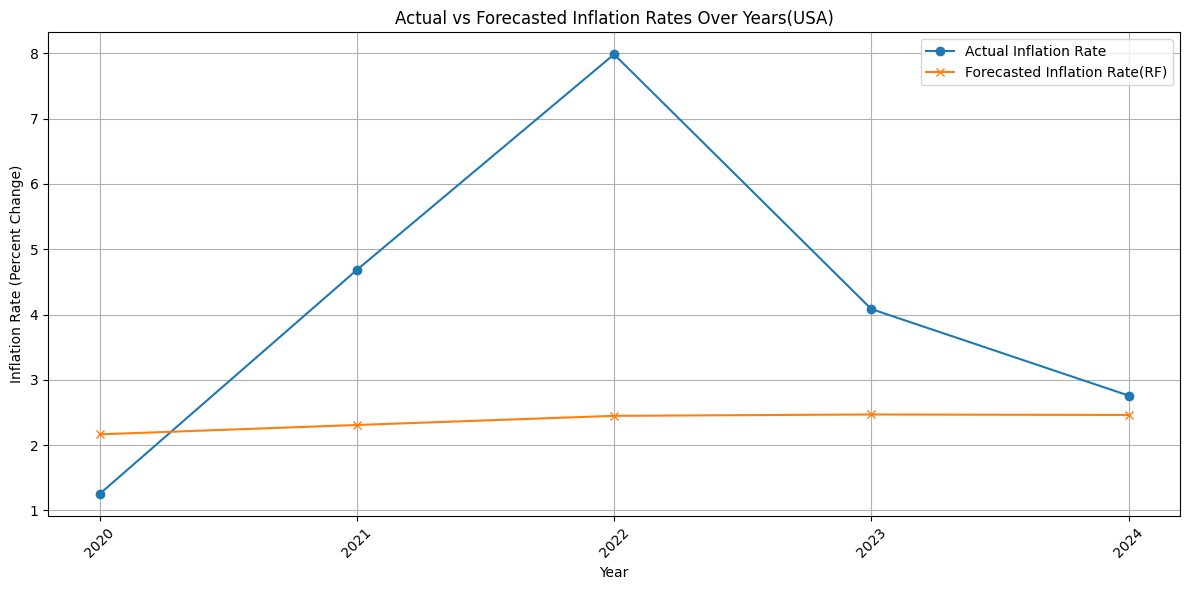

In [8]:
import matplotlib.pyplot as plt

# Extract the 'Year' column for plotting
years = US_prediction_data['Year']

# Extract the actual and forecasted inflation rates
actual_inflation = US_prediction_data['Inflation, average consumer prices (Percent change)']
forecasted_inflation = US_prediction_data['Forecasted_Inflation_Rate(RF)']

# Plot the actual and forecasted inflation rates against the 'Year'
plt.figure(figsize=(12, 6))
plt.plot(years, actual_inflation, label='Actual Inflation Rate', marker='o')
plt.plot(years, forecasted_inflation, label='Forecasted Inflation Rate(RF)', marker='x')
plt.title('Actual vs Forecasted Inflation Rates Over Years(USA)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (Percent Change)')
plt.xticks(years, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define features and target variable
target = 'Inflation, average consumer prices (Percent change)'

X = US_df_from_2002[features].values
y = US_df_from_2002[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_train = model.predict(X_train_scaled)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print(f"Training MAE: {train_mae}")
print("Training MSE:", train_mse)

y_pred_test = model.predict(X_test_scaled)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f"Testing MAE: {test_mae}")
print("Testing MSE:", test_mse)

# Forecasting
new_X = US_prediction_data[features].values
new_X_scaled = scaler.transform(new_X)

new_predictions = model.predict(new_X_scaled)

# Add forecasted data to the prediction dataset
US_prediction_data['Forecasted_Inflation_Rate(NN)'] = new_predictions

# Display the updated prediction dataset with forecasted inflation rates
US_prediction_data[['Year', 'Country','Inflation, average consumer prices (Percent change)','Forecasted_Inflation_Rate(RF)', 'Forecasted_Inflation_Rate(NN)']]
 

Epoch 1/50


/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - loss: 6.0626 - mae: 2.2098 - val_loss: 7.3472 - val_mae: 2.4501
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.6185 - mae: 2.1240 - val_loss: 7.0643 - val_mae: 2.3891
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.2000 - mae: 2.0392 - val_loss: 6.7922 - val_mae: 2.3277
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.8028 - mae: 1.9552 - val_loss: 6.5338 - val_mae: 2.2666
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.4307 - mae: 1.8720 - val_loss: 6.2882 - val_mae: 2.2062
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.0887 - mae: 1.7952 - val_loss: 6.0590 - val_mae: 2.1480
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.7798 - mae: 1.7305 - val_loss: 5.8368 - val_mae: 2.0906
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.4932 - mae: 1.6680 - val_loss: 5.6144 - val_mae: 2.0330
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.2193 - mae: 1.6050 - val_loss: 

Variables,Year,Country,"Inflation, average consumer prices (Percent change)",Forecasted_Inflation_Rate(RF),Forecasted_Inflation_Rate(NN)
0,2020,United States,1.251,2.16488,2.250356
1,2021,United States,4.683,2.30812,4.974346
2,2022,United States,7.986,2.44821,1.209845
3,2023,United States,4.084,2.46906,2.821423
4,2024,United States,2.759,2.46131,2.902959


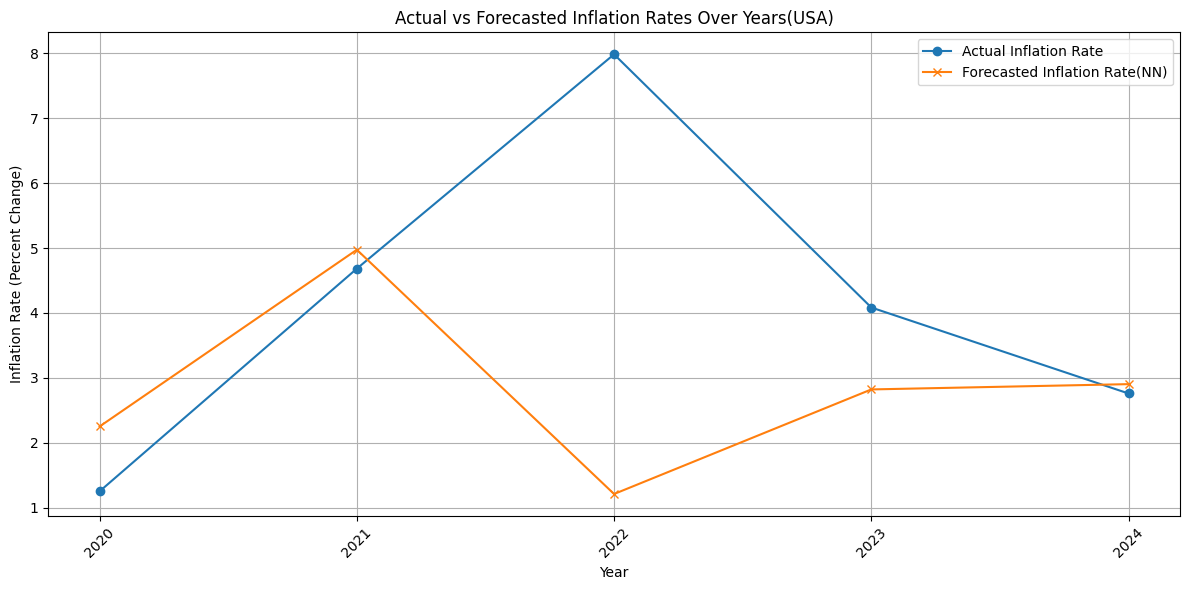

In [10]:
import matplotlib.pyplot as plt

# Extract the 'Year' column for plotting
years = US_prediction_data['Year']

# Extract the actual and forecasted inflation rates
actual_inflation = US_prediction_data['Inflation, average consumer prices (Percent change)']
forecasted_inflation = US_prediction_data['Forecasted_Inflation_Rate(NN)']

# Plot the actual and forecasted inflation rates against the 'Year'
plt.figure(figsize=(12, 6))
plt.plot(years, actual_inflation, label='Actual Inflation Rate', marker='o')
plt.plot(years, forecasted_inflation, label='Forecasted Inflation Rate(NN)', marker='x')
plt.title('Actual vs Forecasted Inflation Rates Over Years(USA)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (Percent Change)')
plt.xticks(years, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from prophet import Prophet

US_df_from_2002['ds'] = pd.to_datetime(US_df_from_2002['Year'], format='%Y').dt.to_period('Y').dt.end_time  # Convert 'Year' to datetime format
US_df_from_2002['y'] = US_df_from_2002['Inflation, average consumer prices (Percent change)'].copy()
# Step 2: Create a Prophet Model
model = Prophet()
model.fit(US_df_from_2002)

# Step 3: Make Predictions
future = model.make_future_dataframe(periods=5, freq='Y')  
forecast = model.predict(future)

# Extract forecasted values
forecasted_inflation = forecast[['ds', 'yhat']].tail(5)
US_prediction_data['Forecasted_Inflation_Rate(Prophet)'] = list(forecasted_inflation['yhat'])
US_prediction_data[['Year', 'Country','Inflation, average consumer prices (Percent change)','Forecasted_Inflation_Rate(RF)', 'Forecasted_Inflation_Rate(NN)','Forecasted_Inflation_Rate(Prophet)']]

00:19:51 - cmdstanpy - INFO - Chain [1] start processing
00:19:51 - cmdstanpy - INFO - Chain [1] done processing


Variables,Year,Country,"Inflation, average consumer prices (Percent change)",Forecasted_Inflation_Rate(RF),Forecasted_Inflation_Rate(NN),Forecasted_Inflation_Rate(Prophet)
0,2020,United States,1.251,2.16488,2.250356,1.536416
1,2021,United States,4.683,2.30812,4.974346,1.406214
2,2022,United States,7.986,2.44821,1.209845,1.282564
3,2023,United States,4.084,2.46906,2.821423,1.165536
4,2024,United States,2.759,2.46131,2.902959,1.272076


In [17]:
test_mse = mean_squared_error(US_prediction_data['Inflation, average consumer prices (Percent change)'], US_prediction_data['Forecasted_Inflation_Rate(Prophet)'])
print("Testing MSE:", test_mse)

Testing MSE: 13.296642879233332


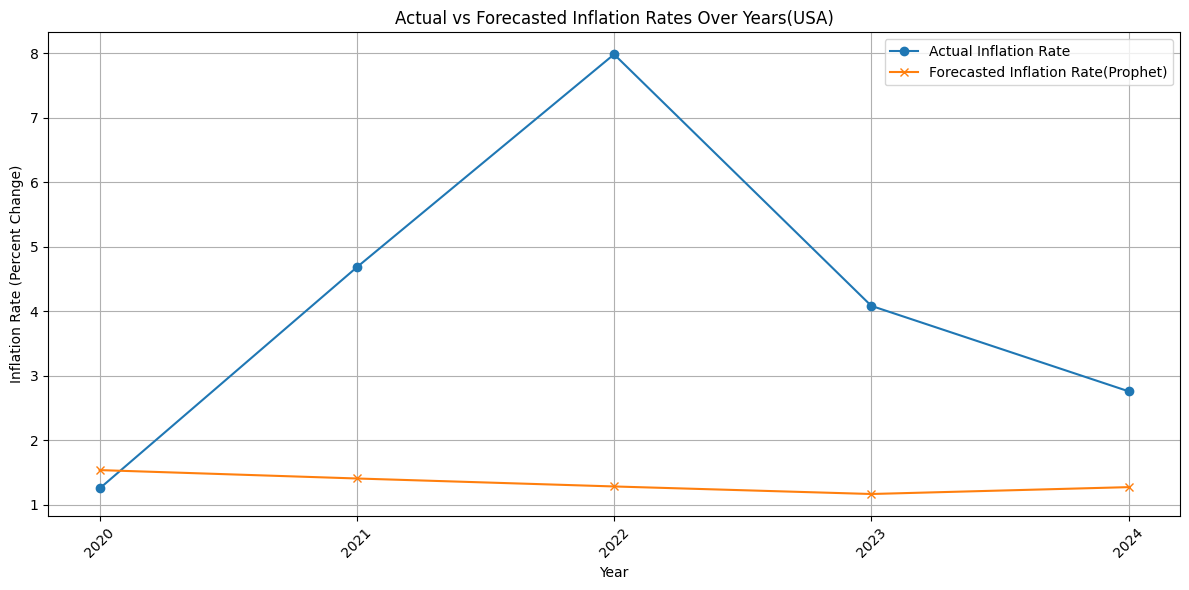

In [18]:
import matplotlib.pyplot as plt

# Extract the 'Year' column for plotting
years = US_prediction_data['Year']

# Extract the actual and forecasted inflation rates
actual_inflation = US_prediction_data['Inflation, average consumer prices (Percent change)']
forecasted_inflation = US_prediction_data['Forecasted_Inflation_Rate(Prophet)']

# Plot the actual and forecasted inflation rates against the 'Year'
plt.figure(figsize=(12, 6))
plt.plot(years, actual_inflation, label='Actual Inflation Rate', marker='o')
plt.plot(years, forecasted_inflation, label='Forecasted Inflation Rate(Prophet)', marker='x')
plt.title('Actual vs Forecasted Inflation Rates Over Years(USA)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (Percent Change)')
plt.xticks(years, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


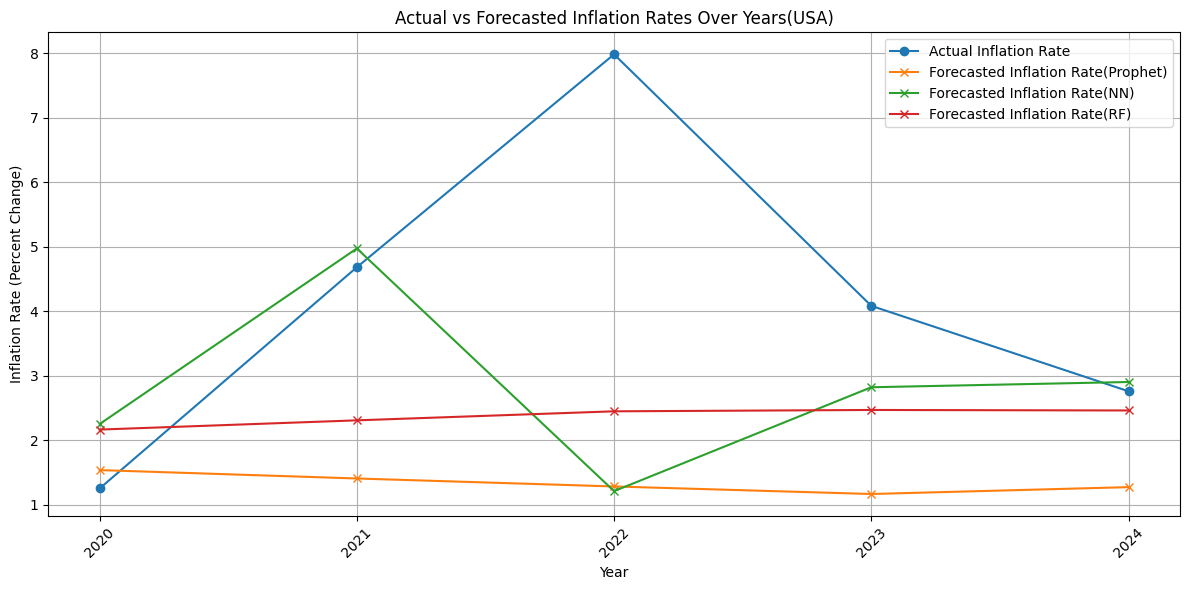

In [19]:
import matplotlib.pyplot as plt

# Extract the 'Year' column for plotting
years = US_prediction_data['Year']

# Extract the actual and forecasted inflation rates
actual_inflation = US_prediction_data['Inflation, average consumer prices (Percent change)']
forecasted_inflation_pr = US_prediction_data['Forecasted_Inflation_Rate(Prophet)']
forecasted_inflation_nn = US_prediction_data['Forecasted_Inflation_Rate(NN)']
forecasted_inflation_rf = US_prediction_data['Forecasted_Inflation_Rate(RF)']

# Plot the actual and forecasted inflation rates against the 'Year'
plt.figure(figsize=(12, 6))
plt.plot(years, actual_inflation, label='Actual Inflation Rate', marker='o')
plt.plot(years, forecasted_inflation_pr, label='Forecasted Inflation Rate(Prophet)', marker='x')
plt.plot(years, forecasted_inflation_nn, label='Forecasted Inflation Rate(NN)', marker='x')
plt.plot(years, forecasted_inflation_rf, label='Forecasted Inflation Rate(RF)', marker='x')
plt.title('Actual vs Forecasted Inflation Rates Over Years(USA)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (Percent Change)')
plt.xticks(years, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Bahrain

In [20]:
country_name = 'Bahrain' 
Br_df_from_2002, Br_prediction_data  = final_country_df(country_name)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Drop rows with missing values and select relevant features
features = ['Year', 'Current account balance (Percent of GDP)',
       'Current account balance (U.S. dollars)',
       'General government gross debt (National currency)',
       'General government gross debt (Percent of GDP)',
       'General government net lending/borrowing (National currency)',
       'General government net lending/borrowing (Percent of GDP)',
       'General government total expenditure (National currency)',
       'General government total expenditure (Percent of GDP)',
       'Gross domestic product based on purchasing-power-parity (PPP) share of world total (Percent)',
       'Gross domestic product corresponding to fiscal year, current prices (National currency)',
       'Gross domestic product per capita, constant prices (National currency)',
       'Gross domestic product per capita, constant prices (Purchasing power parity; 2017 international dollar)',
       'Gross domestic product, constant prices (National currency)',
       'Gross domestic product, constant prices (Percent change)',
       'Gross national savings (Percent of GDP)',
       'Implied PPP conversion rate (National currency per current international dollar)',
       'Total investment (Percent of GDP)']

X = Br_df_from_2002[features]
y = Br_df_from_2002['Inflation, average consumer prices (Percent change)']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred_train = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)

y_pred_test = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)

# Step 6: Forecasting
new_X = Br_prediction_data[features]
new_predictions = model.predict(new_X)

# Add forecasted data to the prediction dataset
Br_prediction_data['Forecasted_Inflation_Rate(RF)'] = new_predictions

# Display the updated prediction dataset with forecasted inflation rates
Br_prediction_data[['Year', 'Country','Inflation, average consumer prices (Percent change)', 'Forecasted_Inflation_Rate(RF)']]


Training MAE: 0.2929228571428578
Training MSE: 0.1257353013000004
Testing MAE: 1.166389999999999
Testing MSE: 2.1300423919499956


Variables,Year,Country,"Inflation, average consumer prices (Percent change)",Forecasted_Inflation_Rate(RF)
0,2020,Bahrain,-2.325,1.02352
1,2021,Bahrain,-0.611,1.82099
2,2022,Bahrain,3.635,1.75908
3,2023,Bahrain,1.000,1.65857
4,2024,Bahrain,1.400,1.76677


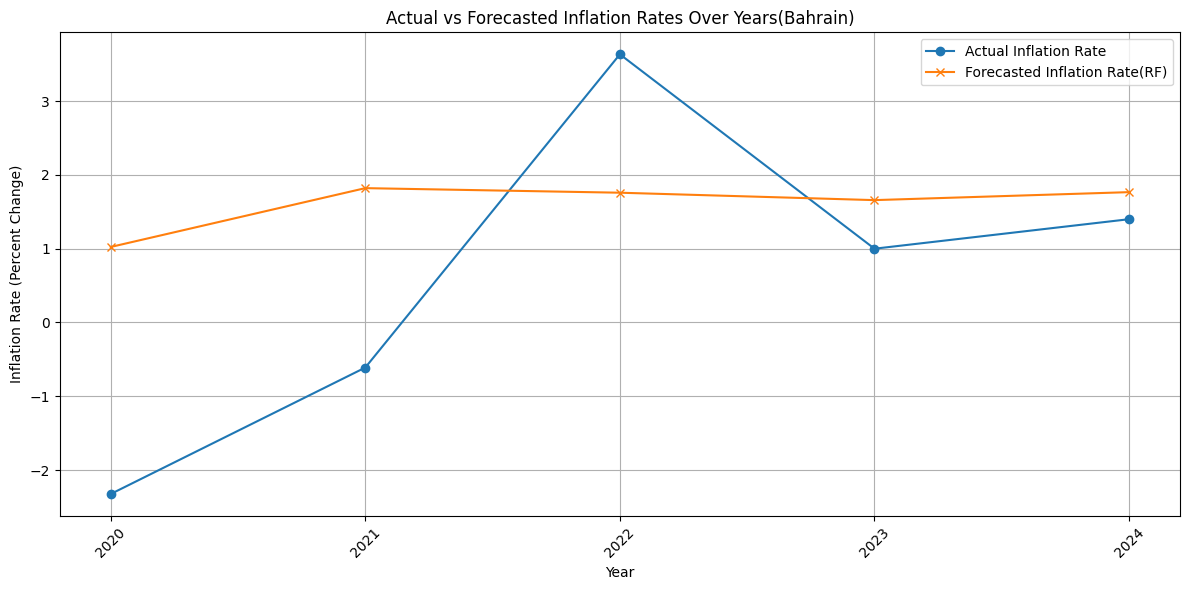

In [22]:
import matplotlib.pyplot as plt

# Extract the 'Year' column for plotting
years = Br_prediction_data['Year']

# Extract the actual and forecasted inflation rates
actual_inflation = Br_prediction_data['Inflation, average consumer prices (Percent change)']
forecasted_inflation = Br_prediction_data['Forecasted_Inflation_Rate(RF)']

# Plot the actual and forecasted inflation rates against the 'Year'
plt.figure(figsize=(12, 6))
plt.plot(years, actual_inflation, label='Actual Inflation Rate', marker='o')
plt.plot(years, forecasted_inflation, label='Forecasted Inflation Rate(RF)', marker='x')
plt.title('Actual vs Forecasted Inflation Rates Over Years(Bahrain)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (Percent Change)')
plt.xticks(years, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define features and target variable
target = 'Inflation, average consumer prices (Percent change)'

X = Br_df_from_2002[features].values
y = Br_df_from_2002[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_train = model.predict(X_train_scaled)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print(f"Training MAE: {train_mae}")
print("Training MSE:", train_mse)

y_pred_test = model.predict(X_test_scaled)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f"Testing MAE: {test_mae}")
print("Testing MSE:", test_mse)

# Forecasting
new_X = Br_prediction_data[features].values
new_X_scaled = scaler.transform(new_X)

new_predictions = model.predict(new_X_scaled)

# Add forecasted data to the prediction dataset
Br_prediction_data['Forecasted_Inflation_Rate(NN)'] = new_predictions

# Display the updated prediction dataset with forecasted inflation rates
Br_prediction_data[['Year', 'Country','Inflation, average consumer prices (Percent change)','Forecasted_Inflation_Rate(RF)', 'Forecasted_Inflation_Rate(NN)']]


Epoch 1/50


/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - loss: 3.9796 - mae: 1.8307 - val_loss: 8.7052 - val_mae: 2.8928
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.7043 - mae: 1.7630 - val_loss: 8.2935 - val_mae: 2.8253
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.4403 - mae: 1.6955 - val_loss: 7.8982 - val_mae: 2.7588
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.1974 - mae: 1.6301 - val_loss: 7.5130 - val_mae: 2.6925
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.9775 - mae: 1.5673 - val_loss: 7.1621 - val_mae: 2.6303
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.7759 - mae: 1.5063 - val_loss: 6.8238 - val_mae: 2.5686
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5890 - mae: 1.4461 - val_loss: 6.5094 - val_mae: 2.5095
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.4132 - mae: 1.3869 - val_loss: 6.2071 - val_mae: 2.4513
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.2449 - mae: 1.3285 - val_loss: 

Variables,Year,Country,"Inflation, average consumer prices (Percent change)",Forecasted_Inflation_Rate(RF),Forecasted_Inflation_Rate(NN)
0,2020,Bahrain,-2.325,1.02352,2.260560
1,2021,Bahrain,-0.611,1.82099,1.770450
2,2022,Bahrain,3.635,1.75908,3.953252
3,2023,Bahrain,1.000,1.65857,2.661331
4,2024,Bahrain,1.400,1.76677,3.365663


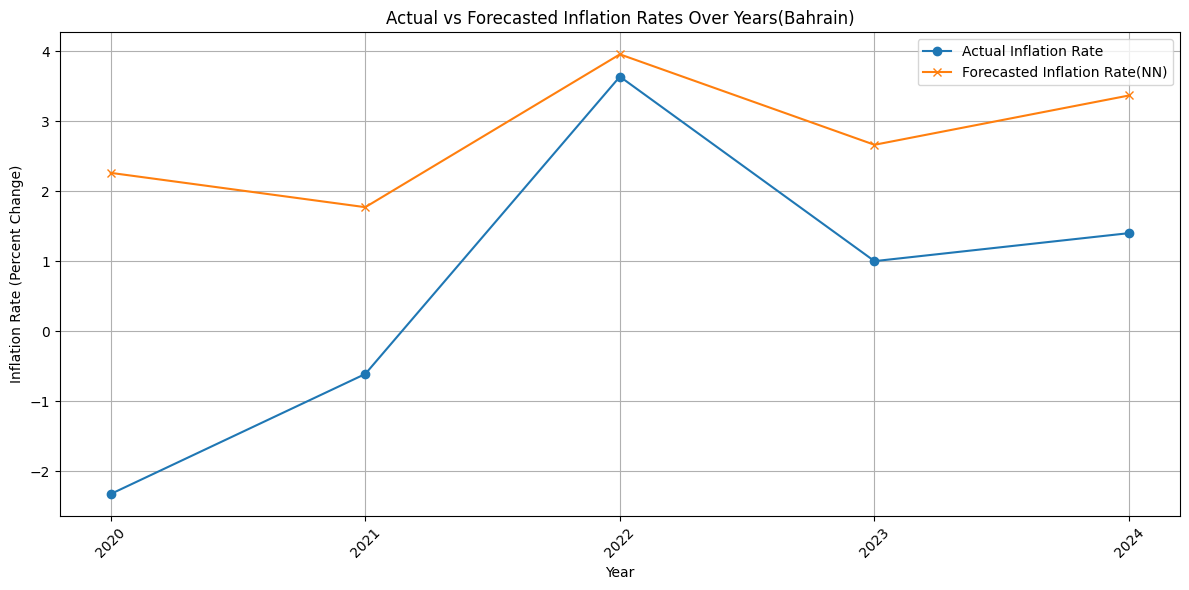

In [41]:
import matplotlib.pyplot as plt

# Extract the 'Year' column for plotting
years = Br_prediction_data['Year']

# Extract the actual and forecasted inflation rates
actual_inflation = Br_prediction_data['Inflation, average consumer prices (Percent change)']
forecasted_inflation = Br_prediction_data['Forecasted_Inflation_Rate(NN)']

# Plot the actual and forecasted inflation rates against the 'Year'
plt.figure(figsize=(12, 6))
plt.plot(years, actual_inflation, label='Actual Inflation Rate', marker='o')
plt.plot(years, forecasted_inflation, label='Forecasted Inflation Rate(NN)', marker='x')
plt.title('Actual vs Forecasted Inflation Rates Over Years(Bahrain)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (Percent Change)')
plt.xticks(years, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
from prophet import Prophet

Br_df_from_2002['ds'] = pd.to_datetime(Br_df_from_2002['Year'], format='%Y').dt.to_period('Y').dt.end_time  # Convert 'Year' to datetime format
Br_df_from_2002['y'] = Br_df_from_2002['Inflation, average consumer prices (Percent change)'].copy()
# Step 2: Create a Prophet Model
model = Prophet()
model.fit(Br_df_from_2002)

# Step 3: Make Predictions
future = model.make_future_dataframe(periods=5, freq='Y')  
forecast = model.predict(future)

# Extract forecasted values
forecasted_inflation = forecast[['ds', 'yhat']].tail(5)
Br_prediction_data['Forecasted_Inflation_Rate(Prophet)'] = list(forecasted_inflation['yhat'])
Br_prediction_data[['Year', 'Country','Inflation, average consumer prices (Percent change)','Forecasted_Inflation_Rate(RF)', 'Forecasted_Inflation_Rate(NN)','Forecasted_Inflation_Rate(Prophet)']]

00:21:18 - cmdstanpy - INFO - Chain [1] start processing
00:21:18 - cmdstanpy - INFO - Chain [1] done processing


Variables,Year,Country,"Inflation, average consumer prices (Percent change)",Forecasted_Inflation_Rate(RF),Forecasted_Inflation_Rate(NN),Forecasted_Inflation_Rate(Prophet)
0,2020,Bahrain,-2.325,1.02352,2.260560,3.019664
1,2021,Bahrain,-0.611,1.82099,1.770450,2.547002
2,2022,Bahrain,3.635,1.75908,3.953252,2.075080
3,2023,Bahrain,1.000,1.65857,2.661331,1.604496
4,2024,Bahrain,1.400,1.76677,3.365663,3.090705


In [25]:
test_mse = mean_squared_error(Br_prediction_data['Inflation, average consumer prices (Percent change)'], Br_prediction_data['Forecasted_Inflation_Rate(Prophet)'])
print("Testing MSE:", test_mse)

Testing MSE: 8.83913093360268


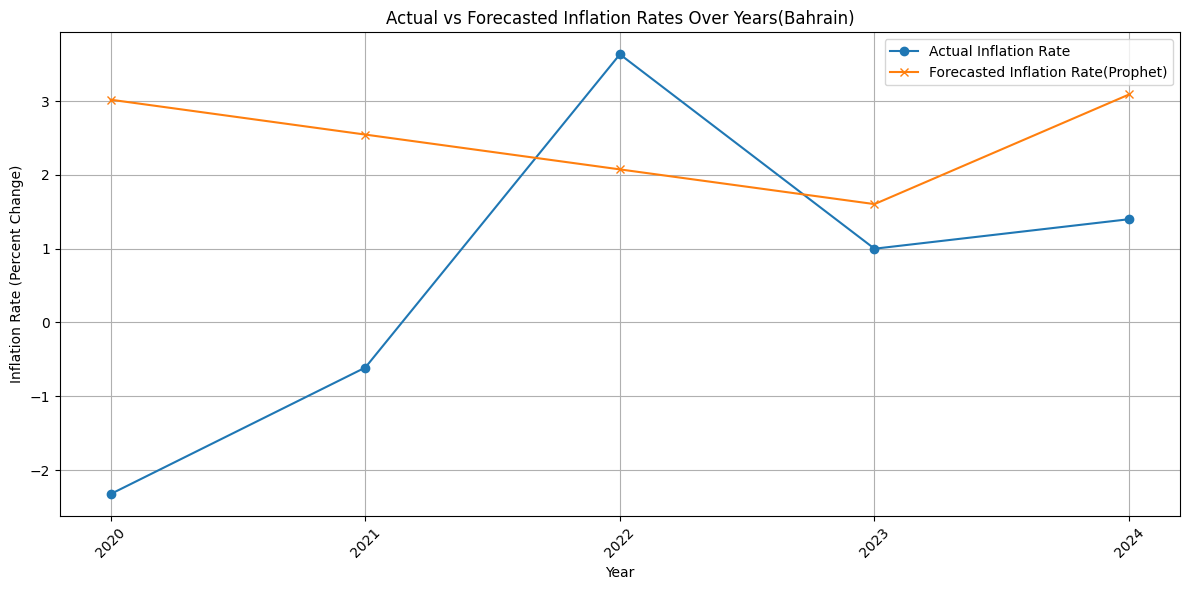

In [26]:
import matplotlib.pyplot as plt

# Extract the 'Year' column for plotting
years = Br_prediction_data['Year']

# Extract the actual and forecasted inflation rates
actual_inflation = Br_prediction_data['Inflation, average consumer prices (Percent change)']
forecasted_inflation = Br_prediction_data['Forecasted_Inflation_Rate(Prophet)']

# Plot the actual and forecasted inflation rates against the 'Year'
plt.figure(figsize=(12, 6))
plt.plot(years, actual_inflation, label='Actual Inflation Rate', marker='o')
plt.plot(years, forecasted_inflation, label='Forecasted Inflation Rate(Prophet)', marker='x')
plt.title('Actual vs Forecasted Inflation Rates Over Years(Bahrain)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (Percent Change)')
plt.xticks(years, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


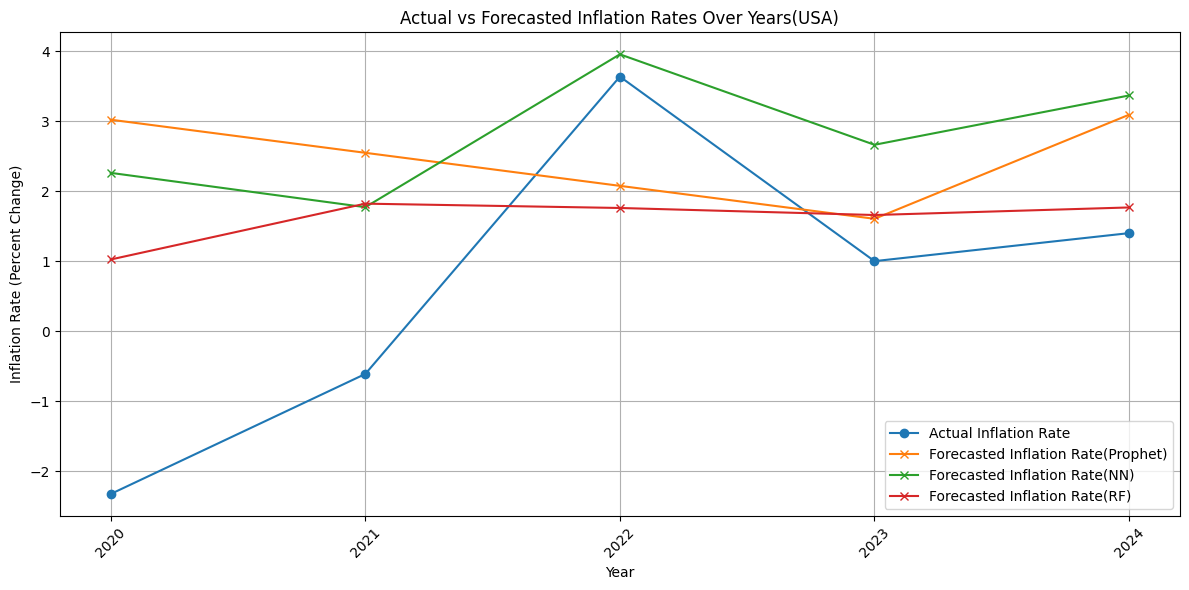

In [27]:
import matplotlib.pyplot as plt

# Extract the 'Year' column for plotting
years = Br_prediction_data['Year']

# Extract the actual and forecasted inflation rates
actual_inflation = Br_prediction_data['Inflation, average consumer prices (Percent change)']
forecasted_inflation_pr = Br_prediction_data['Forecasted_Inflation_Rate(Prophet)']
forecasted_inflation_nn = Br_prediction_data['Forecasted_Inflation_Rate(NN)']
forecasted_inflation_rf = Br_prediction_data['Forecasted_Inflation_Rate(RF)']

# Plot the actual and forecasted inflation rates against the 'Year'
plt.figure(figsize=(12, 6))
plt.plot(years, actual_inflation, label='Actual Inflation Rate', marker='o')
plt.plot(years, forecasted_inflation_pr, label='Forecasted Inflation Rate(Prophet)', marker='x')
plt.plot(years, forecasted_inflation_nn, label='Forecasted Inflation Rate(NN)', marker='x')
plt.plot(years, forecasted_inflation_rf, label='Forecasted Inflation Rate(RF)', marker='x')
plt.title('Actual vs Forecasted Inflation Rates Over Years(USA)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (Percent Change)')
plt.xticks(years, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Bangladesh

In [28]:
country_name = 'Bangladesh' 
Ba_df_from_2002, Ba_prediction_data  = final_country_df(country_name)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Drop rows with missing values and select relevant features
features = ['Year', 'Current account balance (Percent of GDP)',
       'Current account balance (U.S. dollars)',
       'General government gross debt (National currency)',
       'General government gross debt (Percent of GDP)',
       'General government net lending/borrowing (National currency)',
       'General government net lending/borrowing (Percent of GDP)',
       'General government total expenditure (National currency)',
       'General government total expenditure (Percent of GDP)',
       'Gross domestic product based on purchasing-power-parity (PPP) share of world total (Percent)',
       'Gross domestic product corresponding to fiscal year, current prices (National currency)',
       'Gross domestic product per capita, constant prices (National currency)',
       'Gross domestic product per capita, constant prices (Purchasing power parity; 2017 international dollar)',
       'Gross domestic product, constant prices (National currency)',
       'Gross domestic product, constant prices (Percent change)',
       'Gross national savings (Percent of GDP)',
       'Implied PPP conversion rate (National currency per current international dollar)',
       'Total investment (Percent of GDP)']

X = Ba_df_from_2002[features]
y = Ba_df_from_2002['Inflation, average consumer prices (Percent change)']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred_train = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)

y_pred_test = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)

# Step 6: Forecasting
new_X = Ba_prediction_data[features]
new_predictions = model.predict(new_X)

# Add forecasted data to the prediction dataset
Ba_prediction_data['Forecasted_Inflation_Rate(RF)'] = new_predictions

# Display the updated prediction dataset with forecasted inflation rates
Ba_prediction_data[['Year', 'Country','Inflation, average consumer prices (Percent change)', 'Forecasted_Inflation_Rate(RF)']]


Training MAE: 0.3464550000000009
Training MSE: 0.19293885146428494
Testing MAE: 2.5847425000000035
Testing MSE: 13.070200716775023


Variables,Year,Country,"Inflation, average consumer prices (Percent change)",Forecasted_Inflation_Rate(RF)
0,2020,Bangladesh,5.648,7.10671
1,2021,Bangladesh,5.558,6.03513
2,2022,Bangladesh,6.150,6.01815
3,2023,Bangladesh,9.016,7.11100
4,2024,Bangladesh,7.900,7.10415


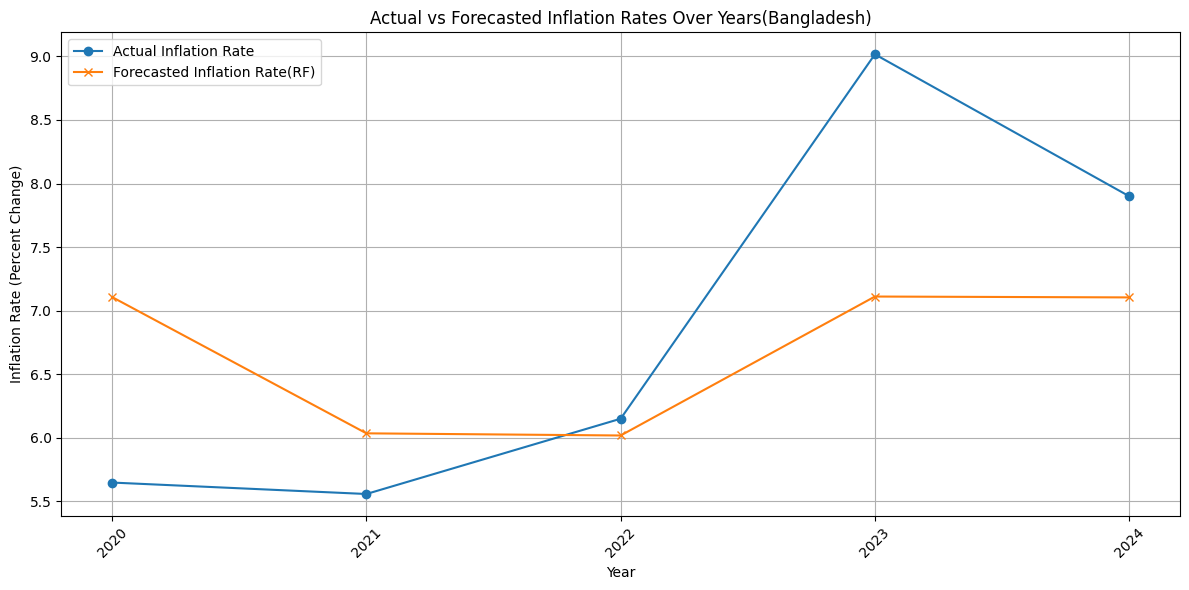

In [40]:
import matplotlib.pyplot as plt

# Extract the 'Year' column for plotting
years = Ba_prediction_data['Year']

# Extract the actual and forecasted inflation rates
actual_inflation = Ba_prediction_data['Inflation, average consumer prices (Percent change)']
forecasted_inflation = Ba_prediction_data['Forecasted_Inflation_Rate(RF)']

# Plot the actual and forecasted inflation rates against the 'Year'
plt.figure(figsize=(12, 6))
plt.plot(years, actual_inflation, label='Actual Inflation Rate', marker='o')
plt.plot(years, forecasted_inflation, label='Forecasted Inflation Rate(RF)', marker='x')
plt.title('Actual vs Forecasted Inflation Rates Over Years(Bangladesh)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (Percent Change)')
plt.xticks(years,rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define features and target variable
target = 'Inflation, average consumer prices (Percent change)'

X = Ba_df_from_2002[features].values
y = Ba_df_from_2002[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_train = model.predict(X_train_scaled)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print(f"Training MAE: {train_mae}")
print("Training MSE:", train_mse)

y_pred_test = model.predict(X_test_scaled)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f"Testing MAE: {test_mae}")
print("Testing MSE:", test_mse)

# Forecasting
new_X = Ba_prediction_data[features].values
new_X_scaled = scaler.transform(new_X)

new_predictions = model.predict(new_X_scaled)

# Add forecasted data to the prediction dataset
Ba_prediction_data['Forecasted_Inflation_Rate(NN)'] = new_predictions

# Display the updated prediction dataset with forecasted inflation rates
Ba_prediction_data[['Year', 'Country','Inflation, average consumer prices (Percent change)', 'Forecasted_Inflation_Rate(NN)']]


Epoch 1/50


/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - loss: 43.5797 - mae: 6.5493 - val_loss: 66.9076 - val_mae: 8.0158
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 42.2595 - mae: 6.4454 - val_loss: 65.8179 - val_mae: 7.9507
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 40.9688 - mae: 6.3415 - val_loss: 64.7578 - val_mae: 7.8865
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 39.7208 - mae: 6.2385 - val_loss: 63.6767 - val_mae: 7.8206
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 38.5214 - mae: 6.1371 - val_loss: 62.6079 - val_mae: 7.7550
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 37.3666 - mae: 6.0368 - val_loss: 61.5559 - val_mae: 7.6898
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 36.2635 - mae: 5.9385 - val_loss: 60.5782 - val_mae: 7.6286
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 35.1892 - mae: 5.8405 - val_loss: 59.6032 - val_mae: 7.5673
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 34.1555 - mae: 5.

Variables,Year,Country,"Inflation, average consumer prices (Percent change)",Forecasted_Inflation_Rate(NN)
0,2020,Bangladesh,5.648,6.667964
1,2021,Bangladesh,5.558,7.252530
2,2022,Bangladesh,6.150,10.129808
3,2023,Bangladesh,9.016,8.768570
4,2024,Bangladesh,7.900,10.267282


In [32]:
Ba_prediction_data[['Year', 'Country','Inflation, average consumer prices (Percent change)','Forecasted_Inflation_Rate(RF)', 'Forecasted_Inflation_Rate(NN)']]

Variables,Year,Country,"Inflation, average consumer prices (Percent change)",Forecasted_Inflation_Rate(RF),Forecasted_Inflation_Rate(NN)
0,2020,Bangladesh,5.648,7.10671,6.667964
1,2021,Bangladesh,5.558,6.03513,7.252530
2,2022,Bangladesh,6.150,6.01815,10.129808
3,2023,Bangladesh,9.016,7.11100,8.768570
4,2024,Bangladesh,7.900,7.10415,10.267282


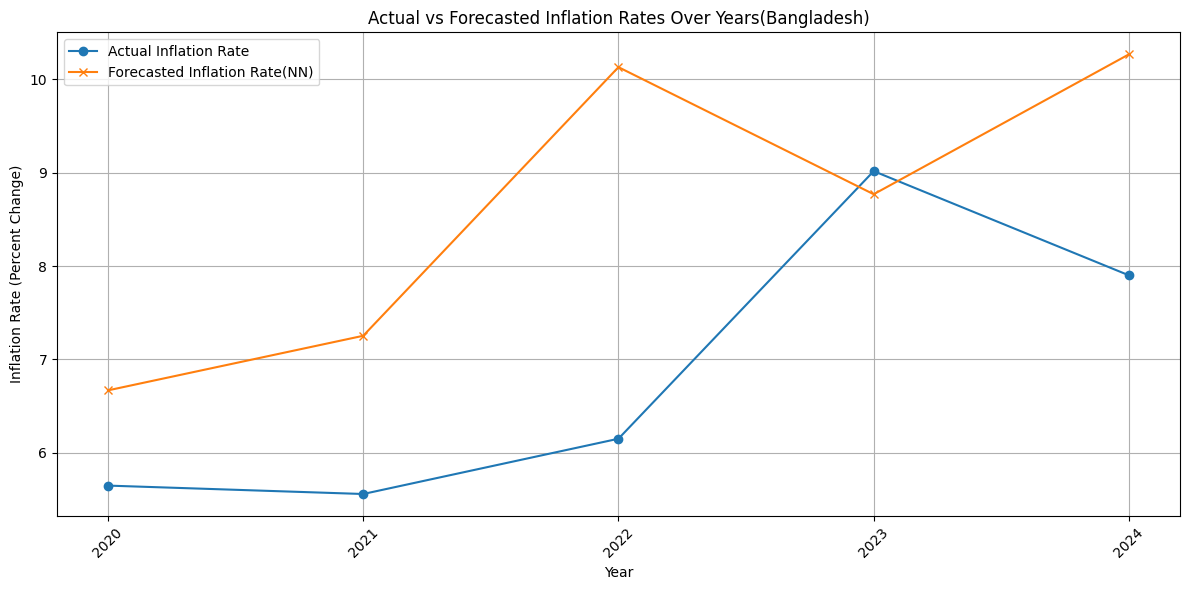

In [43]:
import matplotlib.pyplot as plt

# Extract the 'Year' column for plotting
years = Ba_prediction_data['Year']

# Extract the actual and forecasted inflation rates
actual_inflation = Ba_prediction_data['Inflation, average consumer prices (Percent change)']
forecasted_inflation = Ba_prediction_data['Forecasted_Inflation_Rate(NN)']

# Plot the actual and forecasted inflation rates against the 'Year'
plt.figure(figsize=(12, 6))
plt.plot(years, actual_inflation, label='Actual Inflation Rate', marker='o')
plt.plot(years, forecasted_inflation, label='Forecasted Inflation Rate(NN)', marker='x')
plt.title('Actual vs Forecasted Inflation Rates Over Years(Bangladesh)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (Percent Change)')
plt.xticks(years, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd
from prophet import Prophet

Ba_df_from_2002['ds'] = pd.to_datetime(Ba_df_from_2002['Year'], format='%Y').dt.to_period('Y').dt.end_time  # Convert 'Year' to datetime format
Ba_df_from_2002['y'] = Ba_df_from_2002['Inflation, average consumer prices (Percent change)'].copy()
# Step 2: Create a Prophet Model
model = Prophet()
model.fit(Ba_df_from_2002)

# Step 3: Make Predictions
future = model.make_future_dataframe(periods=5, freq='Y')  
forecast = model.predict(future)

# Extract forecasted values
forecasted_inflation = forecast[['ds', 'yhat']].tail(5)


00:21:39 - cmdstanpy - INFO - Chain [1] start processing
00:21:39 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
Ba_prediction_data['Forecasted_Inflation_Rate(Prophet)'] = list(forecasted_inflation['yhat'])
Ba_prediction_data

Variables,Country,Year,Current account balance (Percent of GDP),Current account balance (U.S. dollars),General government gross debt (National currency),General government gross debt (Percent of GDP),General government net lending/borrowing (National currency),General government net lending/borrowing (Percent of GDP),General government total expenditure (National currency),General government total expenditure (Percent of GDP),...,"Gross domestic product per capita, constant prices (Purchasing power parity; 2017 international dollar)","Gross domestic product, constant prices (National currency)","Gross domestic product, constant prices (Percent change)",Gross national savings (Percent of GDP),Implied PPP conversion rate (National currency per current international dollar),"Inflation, average consumer prices (Percent change)",Total investment (Percent of GDP),Forecasted_Inflation_Rate(RF),Forecasted_Inflation_Rate(NN),Forecasted_Inflation_Rate(Prophet)
0,Bangladesh,2020,-1.454,-5.435,10941.10,34.509,-1534.65,-4.840,4219.33,13.308,...,6058.06,26500.65,3.448,31.418,31.799,5.648,31.308,7.10671,6.667964,7.932107
1,Bangladesh,2021,-1.099,-4.575,12572.56,35.614,-1272.76,-3.605,4577.68,12.967,...,6406.93,28339.44,6.939,30.794,31.836,5.558,31.019,6.03513,7.252530,7.324709
2,Bangladesh,2022,-4.050,-18.639,15037.95,37.863,-1635.56,-4.118,5172.02,13.022,...,6750.75,30351.50,7.100,29.350,31.308,6.150,32.047,6.01815,10.129808,6.779706
3,Bangladesh,2023,-0.747,-3.334,17476.16,39.367,-1981.84,-4.464,5650.81,12.729,...,7085.04,32180.31,6.025,30.215,31.980,9.016,31.254,7.11100,8.768570,6.297800
4,Bangladesh,2024,-0.808,-3.677,19898.06,39.742,-2253.05,-4.500,6658.07,13.298,...,7519.79,34111.13,6.000,30.837,32.841,7.900,31.645,7.10415,10.267282,8.060299


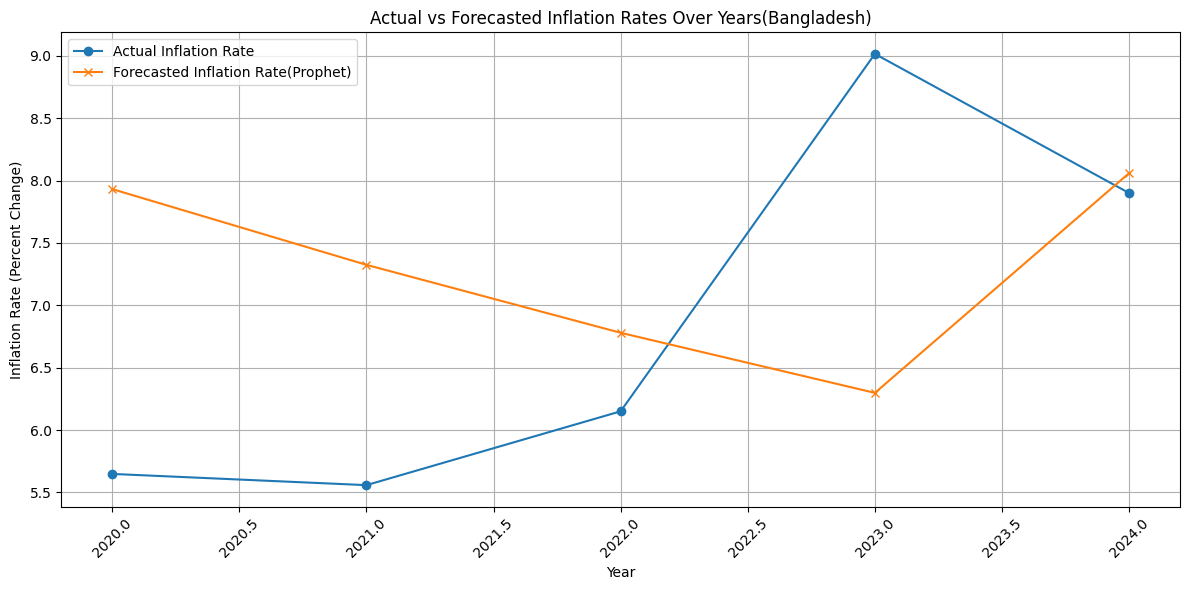

In [36]:
import matplotlib.pyplot as plt

# Extract the 'Year' column for plotting
years = Ba_prediction_data['Year']

# Extract the actual and forecasted inflation rates
actual_inflation = Ba_prediction_data['Inflation, average consumer prices (Percent change)']
forecasted_inflation = Ba_prediction_data['Forecasted_Inflation_Rate(Prophet)']

# Plot the actual and forecasted inflation rates against the 'Year'
plt.figure(figsize=(12, 6))
plt.plot(years, actual_inflation, label='Actual Inflation Rate', marker='o')
plt.plot(years, forecasted_inflation, label='Forecasted Inflation Rate(Prophet)', marker='x')
plt.title('Actual vs Forecasted Inflation Rates Over Years(Bangladesh)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (Percent Change)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
Ba_prediction_data[['Year', 'Country','Inflation, average consumer prices (Percent change)','Forecasted_Inflation_Rate(RF)', 'Forecasted_Inflation_Rate(NN)', 'Forecasted_Inflation_Rate(Prophet)']]

Variables,Year,Country,"Inflation, average consumer prices (Percent change)",Forecasted_Inflation_Rate(RF),Forecasted_Inflation_Rate(NN),Forecasted_Inflation_Rate(Prophet)
0,2020,Bangladesh,5.648,7.10671,6.667964,7.932107
1,2021,Bangladesh,5.558,6.03513,7.252530,7.324709
2,2022,Bangladesh,6.150,6.01815,10.129808,6.779706
3,2023,Bangladesh,9.016,7.11100,8.768570,6.297800
4,2024,Bangladesh,7.900,7.10415,10.267282,8.060299


In [38]:
test_mse = mean_squared_error(Ba_prediction_data['Inflation, average consumer prices (Percent change)'], Ba_prediction_data['Forecasted_Inflation_Rate(Prophet)'])
print("Testing MSE:", test_mse)

Testing MSE: 3.2298483223643766


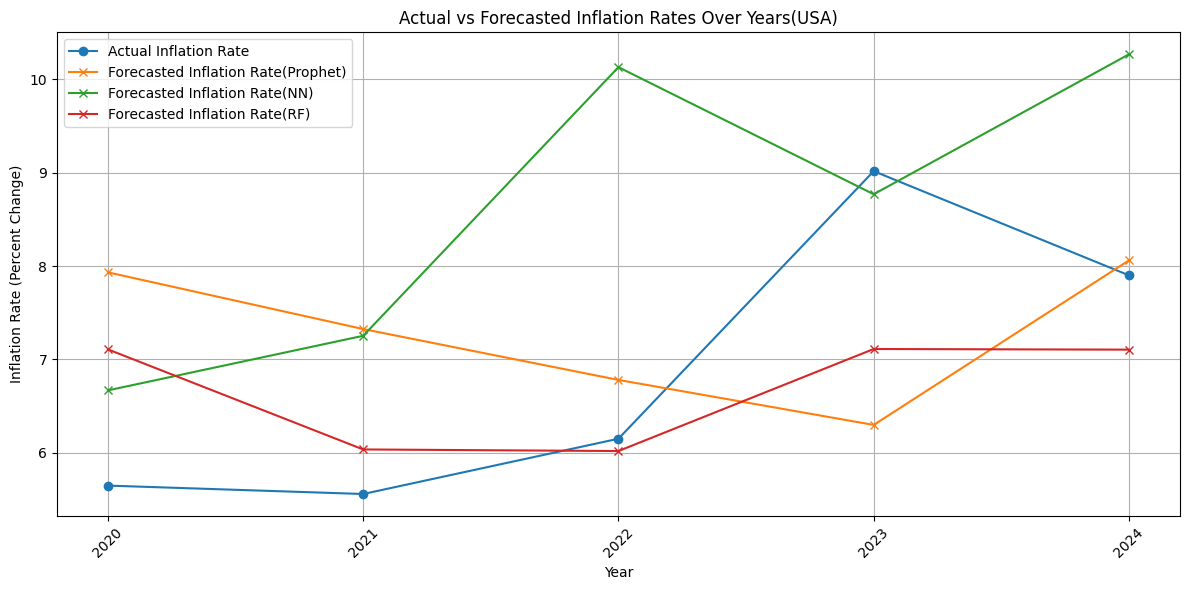

In [39]:
import matplotlib.pyplot as plt

# Extract the 'Year' column for plotting
years = Ba_prediction_data['Year']

# Extract the actual and forecasted inflation rates
actual_inflation = Ba_prediction_data['Inflation, average consumer prices (Percent change)']
forecasted_inflation_pr = Ba_prediction_data['Forecasted_Inflation_Rate(Prophet)']
forecasted_inflation_nn = Ba_prediction_data['Forecasted_Inflation_Rate(NN)']
forecasted_inflation_rf = Ba_prediction_data['Forecasted_Inflation_Rate(RF)']

# Plot the actual and forecasted inflation rates against the 'Year'
plt.figure(figsize=(12, 6))
plt.plot(years, actual_inflation, label='Actual Inflation Rate', marker='o')
plt.plot(years, forecasted_inflation_pr, label='Forecasted Inflation Rate(Prophet)', marker='x')
plt.plot(years, forecasted_inflation_nn, label='Forecasted Inflation Rate(NN)', marker='x')
plt.plot(years, forecasted_inflation_rf, label='Forecasted Inflation Rate(RF)', marker='x')
plt.title('Actual vs Forecasted Inflation Rates Over Years(USA)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (Percent Change)')
plt.xticks(years, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
